# AI Predictive Maintenance for Machines

# 기계를 위한 AI 예측 유지보수

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.- AI가 항공기의 센서 데이터를 사용하여 유지 관리가 필요한 센서를 예측하는 방법을 연구합니다.

## Context

우리는 [Github](https://github.com/Samimust/predictive-maintenance/tree/master/data)에서 얻은 항공기 센서 데이터를 사용합니다. csv 파일에는 Microsoft에서 제공하는 시뮬레이션된 항공기 엔진 고장 이벤트, 작동 설정 및 21개 센서 측정값이 포함되어 있습니다. 엔진의 성능 저하 패턴이 센서 측정에 반영된다고 가정합니다.

## Use Python to open csv files

[scikit-learn](https://scikit-learn.org/stable/), [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/)를 사용하여 데이터 세트를 작업합니다. Scikit-learn은 예측 데이터 분석을 위한 효율적인 도구를 제공하는 매우 유용한 기계 학습 라이브러리입니다. Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다. Matplotlib은 고품질의 데이터 시각화를 위한 Python의 2차원 그래프 라이브러리입니다. 코드 몇 줄만으로 간단하게 복잡한 그래프를 만들 수 있어서 사용성이 매우 높습니다.

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor # 

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel, RFECV

### Data 설명

In [3]:
# Train 데이터 불러오기
df_train = pd.read_csv(r'[Dataset]_Module11_Train_(Maintenance).csv')


데이터 세트에는 시뮬레이션된  시뮬레이션된 항공기 엔진 고장 이벤트, 작동 설정 및 21개 센서 측정값이 포함되어 있습니다. 이제 그 Data를 실제로 보도록 하겠습니다.

In [4]:
#데이터 프레임 확인 
df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.027684,0.0,1.643168,0.0,0.0,0.163003,0.086540,4,1,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.022507,0.0,1.516575,0.0,0.0,0.142583,0.093479,3,1,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.028242,0.0,1.816590,0.0,0.0,0.137113,0.116735,2,1,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.028081,0.0,1.643168,0.0,0.0,0.138094,0.112731,1,1,2


## Task1: 첫 10개 행을 출력하여 train 데이터 탐색하기

In [5]:
# your cod ehere

In [6]:
# test 데이터 불러오기
df_test = pd.read_csv(r'[Dataset]_Module11_Test_(Maintenance).csv')
df_test.head(10)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0
5,6,105,0.0076,-0.0003,100.0,518.67,643.05,1586.94,1404.49,14.62,...,0.007488,0.0,0.447214,0.0,0.0,0.153395,0.071794,93,0,0
6,7,160,0.0016,-0.0001,100.0,518.67,642.10,1589.59,1413.57,14.62,...,0.016718,0.0,0.000000,0.0,0.0,0.098387,0.063694,91,0,0
7,8,166,0.0016,-0.0005,100.0,518.67,642.59,1591.91,1413.89,14.62,...,0.018301,0.0,0.447214,0.0,0.0,0.054314,0.036437,95,0,0
8,9,55,-0.0003,0.0004,100.0,518.67,642.27,1593.61,1410.27,14.62,...,0.013525,0.0,0.836660,0.0,0.0,0.015166,0.047928,111,0,0
9,10,192,-0.0018,0.0004,100.0,518.67,643.00,1589.50,1398.99,14.62,...,0.030489,0.0,0.836660,0.0,0.0,0.087920,0.055861,96,0,0


## Task 2: describe 함수를 사용하여 train과 test data set 에 대한 정보 가져오기

In [7]:
# your code here

In [8]:
df_test.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,100.000000,100.000000,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,...,100.000000,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,130.960000,-0.000073,0.000022,100.0,5.186700e+02,642.768400,1591.824700,1410.548200,1.462000e+01,...,0.019207,0.0,0.889000,0.0,0.0,0.093899,0.057975,75.52000,0.250000,0.350000
std,29.011492,53.593479,0.002353,0.000306,0.0,1.142596e-12,0.444592,6.646293,8.626344,2.856489e-14,...,0.008033,0.0,0.307613,0.0,0.0,0.035885,0.020325,41.76497,0.435194,0.657129
min,1.000000,31.000000,-0.005900,-0.000500,100.0,5.186700e+02,641.750000,1576.930000,1389.330000,1.462000e+01,...,0.004287,0.0,0.000000,0.0,0.0,0.015166,0.018966,7.00000,0.000000,0.000000
25%,25.750000,88.750000,-0.001650,-0.000300,100.0,5.186700e+02,642.490000,1587.007500,1403.912500,1.462000e+01,...,0.013697,0.0,0.707107,0.0,0.0,0.070107,0.042731,32.75000,0.000000,0.000000
50%,50.500000,133.500000,-0.000250,0.000100,100.0,5.186700e+02,642.775000,1591.365000,1410.300000,1.462000e+01,...,0.018009,0.0,0.836660,0.0,0.0,0.088544,0.055796,86.00000,0.000000,0.000000
75%,75.250000,164.250000,0.001300,0.000300,100.0,5.186700e+02,643.025000,1597.280000,1416.922500,1.462000e+01,...,0.023288,0.0,1.140175,0.0,0.0,0.114105,0.072792,112.25000,0.250000,0.250000
max,100.000000,303.000000,0.007600,0.000500,100.0,5.186700e+02,644.030000,1607.550000,1428.420000,1.462000e+01,...,0.049270,0.0,1.483240,0.0,0.0,0.187216,0.115700,145.00000,1.000000,2.000000


In [9]:
# 누락된 값 확인
df_train.isnull().sum()

id           0
cycle        0
setting1     0
setting2     0
setting3     0
            ..
sd20         0
sd21         0
ttf          0
label_bnc    0
label_mcc    0
Length: 71, dtype: int64

## Data 시각화

데이터를 시각화하면 다양한 feature가 어떻게 분포되어 있는지에 대한 아이디어를 얻을 수 있으므로 분석에 도움이 됩니다.

In [10]:
#1 features를 생성. 데이터 프레임의 열 이름을 저장할 공간으로 사용
#2 데이터 프레임 df_train의 열 이름을 하나씩 반복적으로 확인하는 for 루프를 시작
#3 현재 열의 이름(col)을 features 리스트에 추가합니다. 데이터 프레임의 모든 열 이름이 features 리스트에 순서대로 저장

features = [] #1
for col in df_train.columns: #2
    features.append(col) #3    

<AxesSubplot:title={'center':'Features Standard Deviation'}>

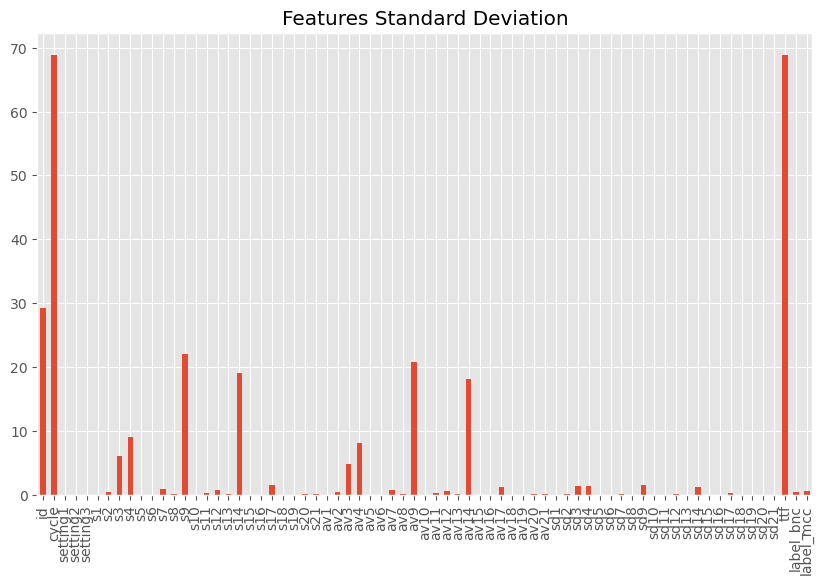

In [11]:
# 입력 feature의 표준 편차를 그려서 비교합니다:
#1 kind='bar': 막대 그래프를 생성하도록 지정
#2 figsize=(10,6): 그래프의 크기를 가로 10 단위, 세로 6 단위로 설정합니다.
#3 그래프의 타이틀을 "Features Standard Deviation"로 설정

df_train[features].std().plot(kind='bar', # 1
                              figsize=(10,6), # 2 
                              title="Features Standard Deviation") # 3

feature 간의 상관 관계를 확인합니다.

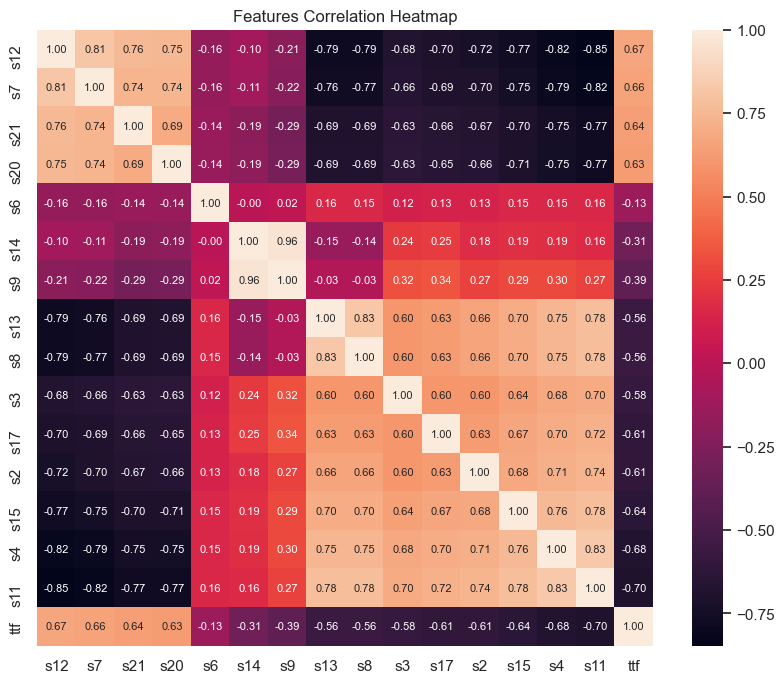

In [12]:
# 더 나은 시각화를 위해 feature의 하위 집합인 feat를 사용하여 상관관계 행렬을 그려봅니다.
feat= ['s12',
 's7',
 's21',
 's20',
 's6',
 's14',
 's9',
 's13',
 's8',
 's3',
 's17',
 's2',
 's15',
 's4',
 's11',
 'ttf']

import seaborn as sns
cm = np.corrcoef(df_train[feat].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=feat, xticklabels=feat)
plt.title('Features Correlation Heatmap')
plt.show()

## 선형 회귀를 위한 데이터 준비

In [13]:
# 회귀 모델을 위한 데이터를 준비합시다.

# 원본 feature 리스트 입니다.
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# 회귀 레이블과 상관 관계가 낮거나 없는 feature 리스트 입니다.
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# 회귀 레이블과 상관 관계가 있는 feature 리스트 입니다.
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

# features는 실험할 feature 집합을 보유하는 변수이다.
features = features_orig

In [14]:
X_train = df_train[features] # X_train 변수 설정
y_train = df_train['ttf'] # y_train 변수설정

X_test = df_test[features] # X_test 변수설정
y_test = df_test['ttf'] # y_test 변수설정

## Helper 함수

In [15]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
     # 회귀 모델의 성능 지표를 저장할 딕셔너리 정의
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5, #RMSE, 평균제곱오차(실제, 오차)                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted), #R^2 결정계수, 결정계수 값(실제, 오차)
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted) #R^2 결정계수, 결정계수 값(실제, 오차)
                   }
    
    # Explained Variance : 통계에서 주어진 데이터의 분산을 설명하는 비율을 측정
  
    # reg_metrics 반환 # 회귀 모델의 성능 지표를 데이터프레임으로 변환
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index') 
    # pd.DataFrame.from_dict(): 이 함수는 파이썬 딕셔너리를 데이터프레임으로 변환
    # 딕셔너리의 키가 데이터프레임의 행 인덱스로 들어갑
    
    df_regr_metrics.columns = [model] # 데이터프레임의 열 이름을 모델 이름으로 지정
    
    return df_regr_metrics

In [16]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    # plot_features_weights는 회귀 모델의 회귀 계수(weights) 또는 특성 중요도(feature importance)를 시각화하는 함수
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5) 
    # px 및 py: 플롯의 크기를 결정하기 위한 변수로, 특성의 수에 따라 크기가 조정
    
    W = pd.DataFrame({'Weights':weights}, feature_names) 
    # 데이터프레임 생성: 특성 이름과 회귀 계수(weights) 또는 특성 중요도를 열로 포함
    
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    # 플롯 생성: 가로 막대 그래프(barh)를 사용하여 회귀 계수(weights) 또는 특성 중요도를 시각화
    
    # 플롯에 대한 라벨 설정
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    # label 변수는 플롯에 표시될 라벨(설명)을 결정합니다. 'c'일 경우 'Coefficients', 그 외의 경우 'Features Importance'가 됨
    
    plt.xlabel(model + label)
    
    # 범례(legend) 제거
    plt.gca().legend_ = None


In [17]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    # 회귀 모델의 잔차(residuals)를 시각화하는 함수인 plot_residual를 정의
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    # 훈련 데이터와 테스트 데이터의 잔차를 산점도로 시각화
    #잔차는 회귀식과 관측값 사이의 차이를 의미 x,y축 그래프에서 특정 데이터의 y갑과 선그래프 y값의 차이 

    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    
    # x축과 y축 레이블 설정
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    
    # 범례(legend) 설정
    plt.legend(loc='upper left')
    
    # 수평선을 추가하여 잔차의 평균이 0인지 확인
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    
    # 그래프 제목
    plt.title(model + ' Residuals')
    
    # 그래프 출력
    plt.show()

## 선형 회귀 모델

선형 회귀는 종속 변수(출력)와 하나 이상의 독립 변수(입력) 간의 관계를 모델링하는 간단한 모델입니다.

![linear regression](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)

RMSE

RMSE는 평균 제곱근 오차를 나타냅니다. 기계 학습 모델을 사용하여 예측을 수행할 때 예측이 정확한지 확인해야 합니다. RMSE는 예측 오류를 측정하는 방법입니다. RMSE가 높으면 예측이 나쁘고, 낮으면 예측이 좋은 것입니다.

MAE

MAE는 평균 절대 오차를 나타냅니다. RMSE와 마찬가지로 MAE는 예측의 오류를 측정하는 방법입니다. MAE가 높으면 예측이 나쁘고 그 반대의 경우 좋은 것입니다.

In [18]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


,Linear Regression
Root Mean Squared Error,32.041095
R^2,0.405495
Explained Variance,0.665297


In [19]:
# 해석

# R-squared는 0에서 1 사이의 값을 가지며,
# 1에 가까울수록 모델이 훈련 데이터를 완벽하게 설명함
# 여기서 0.580은 훈련 데이터에 대한 모델의 설명력이 어느 정도 높다

# 테스트 데이터를 설명하는 데 모델이 덜 효과적이며, 데이터의 분산 중 약 40.5%만을 설명할 수 있음

# Root Mean Squared Error (RMSE): 평균 제곱근 오차는 예측값과 실제값의 차이를 나타내는 지표로, 
# 낮을수록 모델의 예측이 정확함. 여기서는 약 32.041의 RMSE가 나타남

# Mean Absolute Error (MAE): 평균 절대 오차는 예측값과 실제값의 절대 차이를 나타내며, 
# 낮을수록 모델의 예측이 정확합니다. 여기서는 약 25.592의 MAE가 나타납니다.

# Explained Variance: 설명된 분산은 모델이 데이터의 분산을 얼마나 잘 설명하는지를 나타내는 지표로, 
# 1에 가까울수록 모델의 설명력이 높습니다. 여기서는 약 0.665의 설명된 분산이 나타납니다.

## Task 3: 선형 회귀로 얻은 feature의 가중치를 그려봅니다.

In [20]:
# your code here

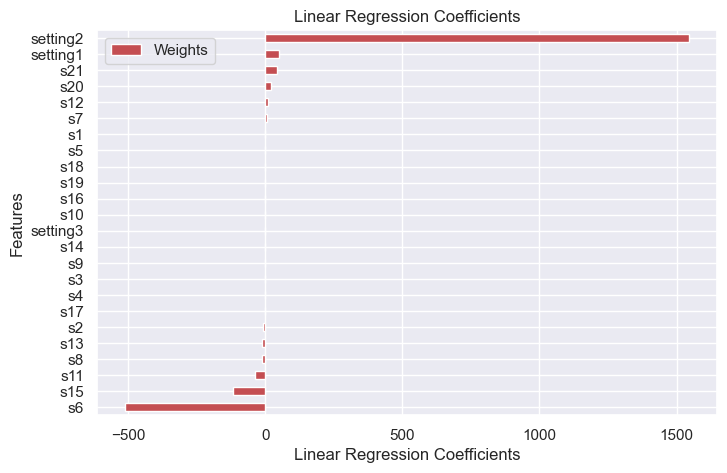

In [21]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    """
    Plot regression coefficients weights or feature importance.

    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'

    Returns:
        Plot of regression coefficients weights or feature importance
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights': weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px, py))
    label = ' Coefficients' if weights_type == 'c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.ylabel('Features')
    plt.title('Linear Regression Coefficients')


weights = linreg.coef_


feature_names = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


plot_features_weights('Linear Regression', weights, feature_names, weights_type='c')
plt.show()

setting2, setting1, s1, s2 등의 데이터 모델의 매개변수가 그래프에 표시되어 있습니다. setting2와 s6의 빨간색 선이 가장 긴 것을 볼 수 있습니다. 그 feature들이 가장 중요합니다.